In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns



Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, accuracy = {acc:.4f}")


k = 1, accuracy = 0.9667
k = 2, accuracy = 0.9333
k = 3, accuracy = 0.9333
k = 4, accuracy = 0.9333
k = 5, accuracy = 0.9333
k = 6, accuracy = 0.9333
k = 7, accuracy = 0.9667
k = 8, accuracy = 0.9333
k = 9, accuracy = 0.9667
k = 10, accuracy = 0.9667
k = 11, accuracy = 0.9667
k = 12, accuracy = 0.9667
k = 13, accuracy = 0.9667
k = 14, accuracy = 0.9333
k = 15, accuracy = 0.9667
k = 16, accuracy = 0.9667
k = 17, accuracy = 0.9667
k = 18, accuracy = 0.9667
k = 19, accuracy = 0.9667
k = 20, accuracy = 0.9667


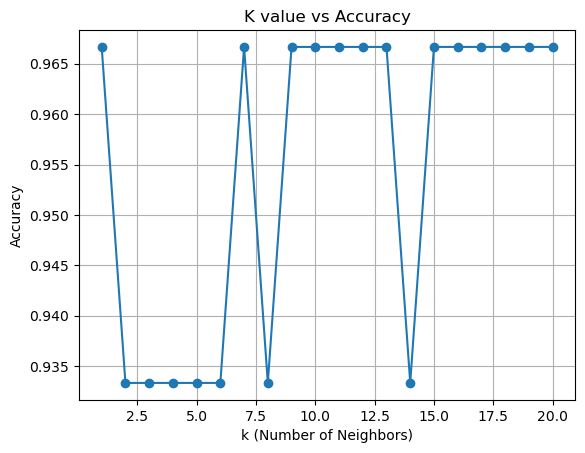

In [8]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K value vs Accuracy")
plt.grid(True)
plt.show()


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

best_k = 1   

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



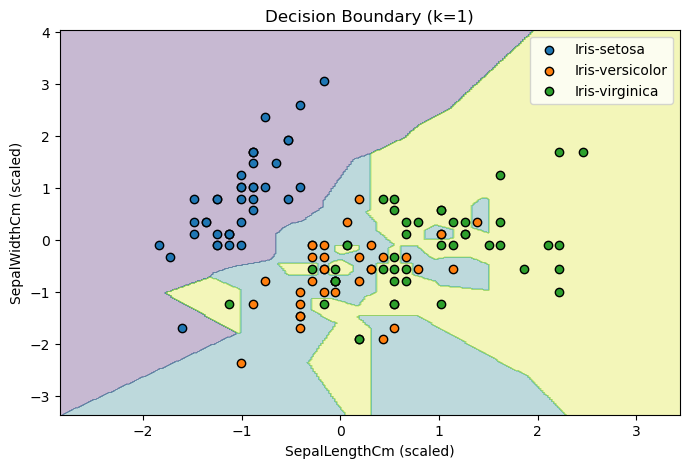

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use only 2 features for 2D boundary
X_2 = df[['SepalLengthCm', 'SepalWidthCm']].values
y_2 = df['Species'].values

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y_2
)

# Scaling
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Train model with chosen k
best_k = 1
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X2_train_scaled, y2_train)

# Create meshgrid
x_min, x_max = X2_train_scaled[:, 0].min() - 1, X2_train_scaled[:, 0].max() + 1
y_min, y_max = X2_train_scaled[:, 1].min() - 1, X2_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict for each point in meshgrid (this gives string labels)
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])

# 🔹 Convert string classes to integers for contourf
classes = np.unique(y2_train)
class_to_int = {c: i for i, c in enumerate(classes)}
Z_num = np.vectorize(class_to_int.get)(Z)
Z_num = Z_num.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,5))
contour = plt.contourf(xx, yy, Z_num, alpha=0.3)

# Scatter training points with same mapping
for species in classes:
    idx = y2_train == species
    plt.scatter(
        X2_train_scaled[idx, 0],
        X2_train_scaled[idx, 1],
        label=species,
        edgecolor='k'
    )

plt.xlabel("SepalLengthCm (scaled)")
plt.ylabel("SepalWidthCm (scaled)")
plt.title(f"Decision Boundary (k={best_k})")
plt.legend()
plt.show()


## Conclusion

- Implemented K-Nearest Neighbors (KNN) classifier on the Iris dataset.
- Used features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
- Tried different K values from 1 to 20 and observed accuracy between 93.33% and 96.67%.
- Best model achieved around 96.67% accuracy.
- Confusion matrix shows that most samples are correctly classified with very few misclassifications.
- Plotted decision boundary using SepalLengthCm and SepalWidthCm for visualization.
